# MongoDB

MongoDB is a document based database with a dynamic data schema. The JavaScript Object Notation (JSON) that it supports is a natural fit for working with objects in modern programming languages like JavaScript, Python and others. This provides an alternative to more traditional Relational Database Management Systems (RDBMS) such as SQL. MongoDB is an example of a NoSQL databases. These databases often use collections of documents instead of the tables used in RDBMS. These databases support dynamic database schemas making them responsive to changes in the structure of data.

## Getting started

Pymongo is a Python driver for MongoDB allowing you to interact with Mongo databases using Python. You first need to have installed MongoDB on your system. If you haven’t already done so, you can read how do that here: https://docs.mongodb.com/manual/installation/

In [1]:
import pymongo

**Connect to a Mongo client. This connects on the default host and port**

In [7]:
client = pymongo.MongoClient('mongodb://localhost:27017/')

**create a database to store some data.**

In [8]:
db = client['med_data']

In [9]:
my_collection = db['patient_data']

In [10]:
patient_record = {
    "Name":"Monty Skinner",
    "Age":87,
    "Sex":"F",
    "Blood pressure": [{"sys":156},{"dia":82}],
    "Heart rate":82
}

## Inserting data

In [12]:
my_collection.insert_one(patient_record)

**If not working --> check if your mongodb_server is running or not in services(search "Services" in windows), if not running then start it and all set!**

In [13]:
for item in my_collection.find():
    print(item)

{'_id': ObjectId('62a571c6b57d29e1a294a1ce'), 'Name': 'Monty Skinner', 'Age': 87, 'Sex': 'F', 'Blood pressure': [{'sys': 156}, {'dia': 82}], 'Heart rate': 82}


In [14]:
from pprint import pprint

for item in my_collection.find():
    pprint(item)

{'Age': 87,
 'Blood pressure': [{'sys': 156}, {'dia': 82}],
 'Heart rate': 82,
 'Name': 'Monty Skinner',
 'Sex': 'F',
 '_id': ObjectId('62a571c6b57d29e1a294a1ce')}


In [15]:
patient_records = [
    {
        "Name":"Adam Boss",
        "Age":55,
        "Sex":"M",
        "Blood pressure":[{"sys":132},{"dia":73}],
        "Heart rate":73
    },
    {
        "Name": "Darren Sanders",
        "Age": 34,
        "Sex": "M",
        "Blood pressure": [{"sys": 120}, {"dia": 70}],
        "Heart rate": 67
     },
     {
        "Name": "Sally-Ann Joyce",
        "Age": 19,
        "Sex": "F",
        "Blood pressure": [{"sys": 121}, {"dia": 72}],
        "Heart rate": 67
     }
]

In [16]:
my_collection.insert_many(patient_records)

## Updating data

In [17]:
my_collection.update_one({"Name":"Darren Sanders"},{"$set":{"Heart rate":88}})

## Embedding or linking data

We can nest data by embedding it. Consider that we want to store some medical test results for a patient. This could include some blood test results and an ECG/EKG image for some investigations for a heart attack and some blood tests, including:

* Creatine Kinase (CK)
* Troponin I (TROP)
* Aspartate aminotransferase (AST)

We can start by creating a field called “test results” which contains an array.

In [105]:
patient_record = {
    "Hospital number": "3432543",
    "Name": "Karen Baker",
    "Age": 45,
    "Sex": "F",
    "Blood pressure": [{"sys": 126}, {"dia": 72}],
    "Heart rate": 78,
    "Test results" :[
        {
            "ECG":"\ecg\scan001.png"
        },
        {
            "BIOCHEM":[{"AST":37},{"CK":180},{"TROPT":0.03}]
        }
    ]
}

In [20]:
my_collection.insert_one(patient_record)

**An alternative to embedding data in this way is to instead link to it. Linking data is also called referencing. This involves storing data in a different collection and referencing it by id. Deciding whether or not to link or embed data is dependent on certain considerations, such as:**

* How often you need to access the embedded information?
* Is the data queried using the embedded information?
* Is the embedded data subject to frequent change?
* How often do you need to access the embedded data without the other information it’s embedded in?
* Depending on the answer to these questions, you may want to link to the data instead. 

*Consider the following example. You may want to store some information about what drugs have been prescribed for a given patient. You could embed this information, but what if you also wanted to store more generic information about the medication also. Here you could have a separate collection with such information that you could link to.*

In [21]:
my_medication = db['medication']

In [22]:
medication_data = [
 {
   "Drug name": "Omeprazole",
   "Type": "Proton pump inhibitor",
   "Oral dose": "20mg once daily",
   "IV dose": "40mg",
   "Net price (GBP)": 4.29
 },
 {
   "Drug name": "Amitriptyline",
   "Type": "Tricyclic antidepressant",
   "Oral dose": "30–75mg daily",
   "IV dose": "N/A",
   "Net price (GBP)": 1.32
 }
]

In [23]:
my_medication.insert_many(medication_data)

In [25]:
for item in my_medication.find():
    pprint(item)

{'Drug name': 'Omeprazole',
 'IV dose': '40mg',
 'Net price (GBP)': 4.29,
 'Oral dose': '20mg once daily',
 'Type': 'Proton pump inhibitor',
 '_id': ObjectId('62a57631b57d29e1a294a1d3')}
{'Drug name': 'Amitriptyline',
 'IV dose': 'N/A',
 'Net price (GBP)': 1.32,
 'Oral dose': '30–75mg daily',
 'Type': 'Tricyclic antidepressant',
 '_id': ObjectId('62a57631b57d29e1a294a1d4')}


**We can use the id’s and the DBRef function to reference this data in another collection. For example:**

In [24]:
from bson.dbref import DBRef

In [26]:
patient_records = [
 {
   "Hospital number": "9956734",
   "Name": "Adam Blythe",
   "Age": 55,
   "Sex": "M",
   "Prescribed medications": [
     DBRef("medication_data", "62a57631b57d29e1a294a1d3"),
     DBRef("medication_data", "62a57631b57d29e1a294a1d4")
   ]
 },
 {
   "Hospital number": "4543673",
   "Name": "Darren Sanders",
   "Age": 34,
   "Sex": "M",
   "Prescribed medications": [
     DBRef("diagnosis_data", "62a57631b57d29e1a294a1d4")
   ]
 }
]

In [29]:
my_collection.insert_many(patient_records)

## Querying data

There are several methods for querying data. All of the methods use the find() function. A query can be provided followed by the field or fields you wish to return in the form:

**collection.find({ query }, { field(s) })**

In [35]:
pprint(my_collection.find({"Name":"Darren Sanders"})[0])

{'Age': 34,
 'Blood pressure': [{'sys': 120}, {'dia': 70}],
 'Heart rate': 88,
 'Name': 'Darren Sanders',
 'Sex': 'M',
 '_id': ObjectId('62a5739cb57d29e1a294a1d0')}


In [36]:
query = {"Name": "Darren Sanders"}
doc = my_collection.find(query)
for i in doc:
  pprint(i)

{'Age': 34,
 'Blood pressure': [{'sys': 120}, {'dia': 70}],
 'Heart rate': 88,
 'Name': 'Darren Sanders',
 'Sex': 'M',
 '_id': ObjectId('62a5739cb57d29e1a294a1d0')}
{'Age': 34,
 'Hospital number': '4543673',
 'Name': 'Darren Sanders',
 'Prescribed medications': [DBRef('diagnosis_data', '62a57631b57d29e1a294a1d4')],
 'Sex': 'M',
 '_id': ObjectId('62a5775bb57d29e1a294a1d6')}


**There are many such comparison operators available, including:**
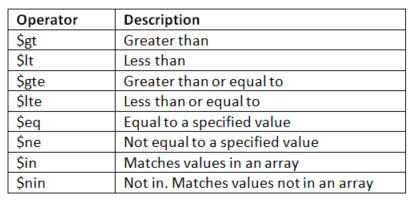

In [37]:
for heart_rate in my_collection.find({"Heart rate":{"$gt":70}},{"Name"}):
    pprint(heart_rate)

{'Name': 'Monty Skinner', '_id': ObjectId('62a571c6b57d29e1a294a1ce')}
{'Name': 'Adam Boss', '_id': ObjectId('62a5739cb57d29e1a294a1cf')}
{'Name': 'Darren Sanders', '_id': ObjectId('62a5739cb57d29e1a294a1d0')}
{'Name': 'Karen Baker', '_id': ObjectId('62a575f5b57d29e1a294a1d2')}


**Logical operators include:**
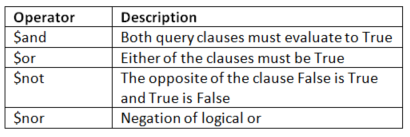

**You might be wondering how we find data that’s contained in arrays. This can be done by using a period (dot). For example you may recall that we stored the patients’ systolic and diastolic blood pressure like so:**

In [46]:
results = my_collection.find({
 "$and" : [
     {
         "Heart rate": {"$gte": 70}
     },
     {
         "Age": {"$lte": 55}
     }
   ]
})

for result in results:
    pprint(result)

{'Age': 55,
 'Blood pressure': [{'sys': 132}, {'dia': 73}],
 'Heart rate': 73,
 'Name': 'Adam Boss',
 'Sex': 'M',
 '_id': ObjectId('62a5739cb57d29e1a294a1cf')}
{'Age': 34,
 'Blood pressure': [{'sys': 120}, {'dia': 70}],
 'Heart rate': 88,
 'Name': 'Darren Sanders',
 'Sex': 'M',
 '_id': ObjectId('62a5739cb57d29e1a294a1d0')}
{'Age': 45,
 'Blood pressure': [{'sys': 126}, {'dia': 72}],
 'Heart rate': 78,
 'Hospital number': '3432543',
 'Name': 'Karen Baker',
 'Sex': 'F',
 'Test results': [{'ECG': '\\ecg\\scan001.png'},
                  {'BIOCHEM': [{'AST': 37}, {'CK': 180}, {'TROPT': 0.03}]}],
 '_id': ObjectId('62a575f5b57d29e1a294a1d2')}


In [49]:
for normal in my_collection.find({"Blood pressure.sys": {"$lt": 130}}):
    pprint(normal)

{'Age': 34,
 'Blood pressure': [{'sys': 120}, {'dia': 70}],
 'Heart rate': 88,
 'Name': 'Darren Sanders',
 'Sex': 'M',
 '_id': ObjectId('62a5739cb57d29e1a294a1d0')}
{'Age': 19,
 'Blood pressure': [{'sys': 121}, {'dia': 72}],
 'Heart rate': 67,
 'Name': 'Sally-Ann Joyce',
 'Sex': 'F',
 '_id': ObjectId('62a5739cb57d29e1a294a1d1')}
{'Age': 45,
 'Blood pressure': [{'sys': 126}, {'dia': 72}],
 'Heart rate': 78,
 'Hospital number': '3432543',
 'Name': 'Karen Baker',
 'Sex': 'F',
 'Test results': [{'ECG': '\\ecg\\scan001.png'},
                  {'BIOCHEM': [{'AST': 37}, {'CK': 180}, {'TROPT': 0.03}]}],
 '_id': ObjectId('62a575f5b57d29e1a294a1d2')}


### Working with existing data

One of the great things about MongoDB is that it is really straight forward to load JSON files and add them to collections. For example if we had some JSON data stored in a JSON file, we could use the json library to read in this data and add it to a MongoDB collection:

* import json
* with open('data_file.json') as f:
      file_data = json.load(f)
* my_collection.insert_many(file_data)**

In [51]:
for item in my_collection.find().limit(5):
    pprint(item)

{'Age': 87,
 'Blood pressure': [{'sys': 156}, {'dia': 82}],
 'Heart rate': 82,
 'Name': 'Monty Skinner',
 'Sex': 'F',
 '_id': ObjectId('62a571c6b57d29e1a294a1ce')}
{'Age': 55,
 'Blood pressure': [{'sys': 132}, {'dia': 73}],
 'Heart rate': 73,
 'Name': 'Adam Boss',
 'Sex': 'M',
 '_id': ObjectId('62a5739cb57d29e1a294a1cf')}
{'Age': 34,
 'Blood pressure': [{'sys': 120}, {'dia': 70}],
 'Heart rate': 88,
 'Name': 'Darren Sanders',
 'Sex': 'M',
 '_id': ObjectId('62a5739cb57d29e1a294a1d0')}
{'Age': 19,
 'Blood pressure': [{'sys': 121}, {'dia': 72}],
 'Heart rate': 67,
 'Name': 'Sally-Ann Joyce',
 'Sex': 'F',
 '_id': ObjectId('62a5739cb57d29e1a294a1d1')}
{'Age': 45,
 'Blood pressure': [{'sys': 126}, {'dia': 72}],
 'Heart rate': 78,
 'Hospital number': '3432543',
 'Name': 'Karen Baker',
 'Sex': 'F',
 'Test results': [{'ECG': '\\ecg\\scan001.png'},
                  {'BIOCHEM': [{'AST': 37}, {'CK': 180}, {'TROPT': 0.03}]}],
 '_id': ObjectId('62a575f5b57d29e1a294a1d2')}


In [57]:
my_collection.count_documents({})

7

# Aggregation

Often when working with data we don’t just want to extract subsets of data using queries, we instead want to produce new information from the existing data. This often involves carrying out various calculations like finding the average or sum of some value. For example the average wage of employees.

Let’s look at a brief example using a sample dataset containing details of restaurant data (the data can be found here: https://docs.atlas.mongodb.com/sample-data/available-sample-datasets/).

**An example document can be seen below:**

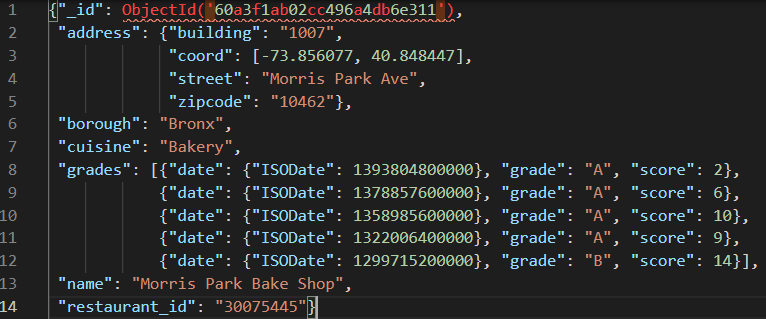

**You can see details of the restaurant address, which borough it is in, the type of cuisine, name, id and details of grades awarded with associated scores. Let’s say we wanted to compute the average scores of the restaurants. To achieve this we can use the aggregate function.**

In [101]:
#result = my_collection.aggregate(
#  [
#     {"$unwind": "$grades"},
#     {"$match”: {}}, 
#     {"$group": {"_id": "$name", "Avg grade": {"$avg": "$grades.score"}}}
#  ]
# )

**Explaination:** We pass an array to the aggregate function. The **unwind** parameter is used to deconstruct the grades array in order to output a document for each element. Next we use the **match** parameter including everything (by using open and closing braces). We could filter further here by providing additional criteria. Next we use the **group** parameter to group the data that we want to apply the computation to. Finally we create new key called “Avg grade” and apply the **avg** (average) parameter to the grades scores referencing grades followed by a dot and the score key.

**Producing the following output (shortened for brevity):**

* {'Avg grade': 15.2, '_id': 'Red Star Restaurant'}
* {'Avg grade': 13.0, '_id': 'Weather Up'}
* {'Avg grade': 9.4, '_id': 'La Nueva Playitas'}
* {'Avg grade': 13.0, '_id': “Marcella’S Pizzeria & Catering”}
* {'Avg grade': 9.0, '_id': 'Hot Wok'}
* {'Avg grade': 9.333333333333334, '_id': '99 Favor Taste'}
* {'Avg grade': 18.0, '_id': 'Flavors Corner'}
* {'Avg grade': 10.666666666666666, '_id': 'Corona Restaurant'}
* {'Avg grade': 9.0, '_id': 'Mila Cafe'}
* {'Avg grade': 8.0, '_id': 'Circle Line Manhattan'}
* {'Avg grade': 15.6, '_id': “The Old Time Vincent’S”}
* {'Avg grade': 10.833333333333334, '_id': 'Riko'}
* {'Avg grade': 10.0, '_id': 'Fresh Tortillas'}
* {'Avg grade': 10.333333333333334, '_id': 'Le Village'}
* {'Avg grade': 13.2, '_id': 'Ruay Thai Restaurant'}
* {'Avg grade': 12.0, '_id': 'Lechonera Don Pancholo'}
* {'Avg grade': 11.0, '_id': 'Pepe Rosso Social'}
* . . .

In [102]:
# There are many other parameters that can be used for common computations such as $sum, $min, $max etc.

# result = my_collection.aggregate(
#  [
#      {"$unwind": "$grades"},
#     {"$match": {}}, 
#      {"$group": {"_id": "$name", "Avg grade": {"$avg": "$grades.score"}}},
#      {"$sort": {"Avg grade": -1}}
#  ]
# )

# We can also add additional functionality as required. For example we might want to sort the returned in ascending or descending order. 
# We could simply add another line with the sort parameter specifying which field to sort by. 1 (ascending) or -1 (descending).

# Using MongoDB in software projects and for data science

*One of the main advantages of MongoDB using the JSON format is the interoperability that this provides with programming languages that use a similar format. This makes working with data in an application and storing/retrieving it from a database near seamless.*

*A better way of integrating a database into code is to use a method such as Object Relational Mapping (ORM), or in the case of MongoDB an Object Document Mapper (ODM).*

*This works by translating Python (or some other languages) code into MongoDB statements to retrieve data. This data is then passed back into Python objects. This has the advantage of ensuring that you only need to use one language (e.g. Python) to access and use the database.*
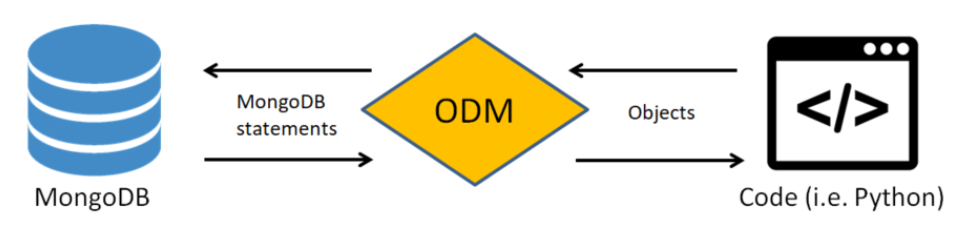

**A good library for doing this is mongoengine. Here we import the library and connect to a Mongo client which we will call odm_patients.**

In [59]:
!pip install mongoengine

     ------------------------------------- 108.9/108.9 kB 67.9 kB/s eta 0:00:00


In [60]:
from mongoengine import *
connect('odm_patients')

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, read_preference=Primary(), uuidrepresentation=3)

In [61]:
class Patient(Document):
    patient_id = StringField(required=True)
    name = StringField()
    age = IntField()
    sex = StringField(max_length=1)
    heart_rate = IntField()

In [62]:
maxine_patient = Patient(patient_id = "342453", name = "Maxine Smith", age = 47, sex = "F", heart_rate = 67).save()

In [63]:
hamza_patient = Patient(patient_id = "543243", name = "Hamza Khan", age = 22, sex = "M", heart_rate = 73).save()

In [64]:
for patient in Patient.objects:
    print(patient.name, patient.patient_id, patient.age)

Maxine Smith 342453 47
Hamza Khan 543243 22


### Apart from integrating Mongo databases into software projects, we can also use this for research and data science/analysis tasks too.

*There is an easy way to convert data from a Mongo database into tabular form as a Panda’s dataframe object. Firstly we import the pandas library.*

In [65]:
import pandas as pd

In [68]:
for item in my_collection.find():
    pprint(item)

{'Age': 87,
 'Blood pressure': [{'sys': 156}, {'dia': 82}],
 'Heart rate': 82,
 'Name': 'Monty Skinner',
 'Sex': 'F',
 '_id': ObjectId('62a571c6b57d29e1a294a1ce')}
{'Age': 55,
 'Blood pressure': [{'sys': 132}, {'dia': 73}],
 'Heart rate': 73,
 'Name': 'Adam Boss',
 'Sex': 'M',
 '_id': ObjectId('62a5739cb57d29e1a294a1cf')}
{'Age': 34,
 'Blood pressure': [{'sys': 120}, {'dia': 70}],
 'Heart rate': 88,
 'Name': 'Darren Sanders',
 'Sex': 'M',
 '_id': ObjectId('62a5739cb57d29e1a294a1d0')}
{'Age': 19,
 'Blood pressure': [{'sys': 121}, {'dia': 72}],
 'Heart rate': 67,
 'Name': 'Sally-Ann Joyce',
 'Sex': 'F',
 '_id': ObjectId('62a5739cb57d29e1a294a1d1')}
{'Age': 45,
 'Blood pressure': [{'sys': 126}, {'dia': 72}],
 'Heart rate': 78,
 'Hospital number': '3432543',
 'Name': 'Karen Baker',
 'Sex': 'F',
 'Test results': [{'ECG': '\\ecg\\scan001.png'},
                  {'BIOCHEM': [{'AST': 37}, {'CK': 180}, {'TROPT': 0.03}]}],
 '_id': ObjectId('62a575f5b57d29e1a294a1d2')}
{'Age': 55,
 'Hospital num

In [94]:
extracted_data = my_collection.find({},{"Name":True,"Age":True,"Sex":1,"Blood pressure":1,"Heart rate":1}) # True = 1 and False = 1

In [95]:
patients_data = list(extracted_data)

In [97]:
df = pd.DataFrame.from_dict(patients_data)

In [98]:
df

,_id,Name,Age,Sex,Blood pressure,Heart rate
0,62a571c6b57d29e1a294a1ce,Monty Skinner,87,F,"[{'sys': 156}, {'dia': 82}]",82.0
1,62a5739cb57d29e1a294a1cf,Adam Boss,55,M,"[{'sys': 132}, {'dia': 73}]",73.0
2,62a5739cb57d29e1a294a1d0,Darren Sanders,34,M,"[{'sys': 120}, {'dia': 70}]",88.0
3,62a5739cb57d29e1a294a1d1,Sally-Ann Joyce,19,F,"[{'sys': 121}, {'dia': 72}]",67.0
4,62a575f5b57d29e1a294a1d2,Karen Baker,45,F,"[{'sys': 126}, {'dia': 72}]",78.0
5,62a5775bb57d29e1a294a1d5,Adam Blythe,55,M,NaN,NaN
6,62a5775bb57d29e1a294a1d6,Darren Sanders,34,M,NaN,NaN


# Conclusion

In summary, MongoDB is a powerful and scalable database that is very useful when the data schema is prone to frequent change. This lends itself to integration with modern software systems easily and can also be used as part of a data analysis pipeline when analysing data in JSON format, such as some mobile app data or Twitter data. MongoDB is one of the most popular NoSQL databases and an awareness of what it is and how it works is a must for software engineers and data scientists.

# The END!